In [61]:
import pandas as pd

df = pd.read_csv("D:/pyradiomics_analysis/reduced_dataset.csv")
df.head()

,ID,Mode,general_info_VolumeNum,general_info_VoxelNum,original_shape_LeastAxis,original_shape_MinorAxis,original_shape_Maximum2DDiameterColumn,original_shape_Elongation,original_shape_SurfaceArea,original_shape_Maximum3DDiameter,...,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_DependenceVariance,original_gldm_GrayLevelVariance,original_gldm_LowGrayLevelEmphasis,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceNonUniformity,original_gldm_SmallDependenceEmphasis,original_gldm_HighGrayLevelEmphasis,original_gldm_DependenceEntropy,original_gldm_SmallDependenceLowGrayLevelEmphasis
0,N01,N,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.008613,-0.000387,-0.734776,-0.000085,-0.000040,-2.647716,-0.001390,5.848379,0.003270,-1.615760e-05
1,N02,E,0,0,0.000000e+00,0.000000e+00,0.000000e+00,-2.575730e-34,0.000000e+00,0.000000e+00,...,0.131322,0.088865,0.181771,-0.000129,-0.000230,-2.809355,0.000073,1.854509,0.002748,-1.018760e-05
2,N05,E,0,0,0.000000e+00,4.748000e-32,0.000000e+00,0.000000e+00,-1.215490e-29,0.000000e+00,...,-0.004333,0.103373,0.826555,0.000056,-0.000147,-8.699518,0.000131,-0.947327,0.007268,1.028020e-06
3,N06,N,0,0,0.000000e+00,0.000000e+00,-5.773910e-32,0.000000e+00,-7.390610e-30,0.000000e+00,...,0.069791,-0.132297,0.037049,0.000032,0.000295,9.984572,0.000194,-0.657619,0.001063,6.655220e-07
4,N07,E,0,0,2.288920e-32,4.577850e-32,0.000000e+00,0.000000e+00,2.343860e-29,-9.155690e-32,...,0.375576,-0.141258,2.663883,0.000068,0.000450,107.370777,0.000644,-11.655376,0.029172,3.747980e-06


In [62]:

small_df = df[["ID","Mode","original_glszm_ZoneVariance","original_glszm_LargeAreaEmphasis","original_glcm_ClusterProminence"]]
small_df.head()


,ID,Mode,original_glszm_ZoneVariance,original_glszm_LargeAreaEmphasis,original_glcm_ClusterProminence
0,N01,N,125.783317,129.025949,-1710.713145
1,N02,E,-8.808910,-11.181812,123.721924
2,N05,E,-911.592731,-917.897317,2184.386776
3,N06,N,-401.126275,-411.418454,39.042007
4,N07,E,-7064.872934,-7073.643983,9990.219015


(30, 2)


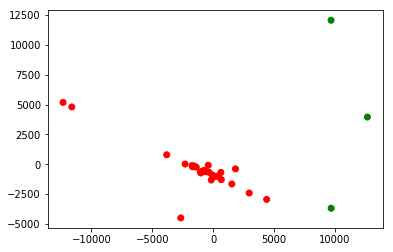

In [63]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(small_df[small_df.columns[2:]]))
kmeans.labels_
colors = []
for x in kmeans.labels_:
    if x:
        colors.append("r")
    else:
        colors.append("g")
pca = PCA(2)
pca.fit(np.array(small_df[small_df.columns[2:]]))
transformed_components = pca.transform(np.array(small_df[small_df.columns[2:]]))
x = transformed_components[:,0]; y = transformed_components[:,1]
print(transformed_components.shape)
plt.scatter(x,y,color = colors)

plt.show()

In [74]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import HoverTool
from bokeh.palettes import Category20_20 as palette
import itertools
outputfile("D:/pyradiomics_analysis/KMeansClustering.")
hover = HoverTool(
    tooltips=[
        #("index", "$index"),
        #("(x,y)", "($x, $y)"),
        ("Patient_ID", "@_class"),
    ]
)
p = figure(title="Clustering of Important Features", x_axis_label='x', y_axis_label='y',
           tools=[hover,"lasso_select","pan","zoom_in","zoom_out","crosshair",])
data = dict(x=x,y=y,_class = df.ID.values)
a_dict = {}
for i in range(len(x)):
    a_dict[df.Mode.values[i]] = []
for i in range(len(x)):
    a_dict[df.Mode.values[i]].append([x[i],y[i],df.ID.values[i]])
    
colors = itertools.cycle(palette)
for mode in a_dict:
    x = [i[0] for i in a_dict[mode]]
    y = [i[1] for i in a_dict[mode]]
    ids = [i[2] for i in a_dict[mode]]
    data = dict(x=x,y=y,_class=ids)
    
    p.circle("x","y",source = data,color = next(colors))
    
show(p)

c:\users\rhydian\appdata\local\programs\python\python35\lib\site-packages\bokeh\core\json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


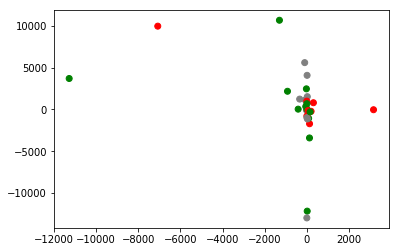

In [73]:
small_df.head()

zone_var = small_df.original_glszm_ZoneVariance.values
LAE = small_df.original_glszm_LargeAreaEmphasis.values
ClusterProm = small_df.original_glcm_ClusterProminence.values
colors = []
for i in df.Mode.values:
    if i == "N":
        colors.append("r")
    if i == "E":
        colors.append("g")
    else:
        colors.append("gray")
plt.scatter(LAE,ClusterProm, color = colors)
plt.show()